#### **Credit Card Customer Churn Prediction**

Binary Classification model of predicting the probability of customer leaning the bank or not.

dataset : https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
df.drop(columns=["RowNumber", "CustomerId",	"Surname"], inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [11]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [14]:
X_scaled = scaler.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 1)

In [63]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [64]:
model = Sequential()

model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\rahul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 172 (688.00 B)

 Trainable params: 172 (688.00 B)

 Non-trainable params: 0 (0.00 B)

In [66]:
model.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=["accuracy"]
)

In [67]:
history = model.fit(X_train, y_train,validation_split=0.2, epochs=100)

Epoch 1/100


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4668 - loss: 0.7633 - val_accuracy: 0.7594 - val_loss: 0.5718
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.7763 - loss: 0.5506 - val_accuracy: 0.7994 - val_loss: 0.4943
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.7925 - loss: 0.4819 - val_accuracy: 0.7987 - val_loss: 0.4558
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7881 - loss: 0.4588 - val_accuracy: 0.7975 - val_loss: 0.4381
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.8063 - loss: 0.4286 - val_accuracy: 0.8050 - val_loss: 0.4262
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8132 - loss: 0.4138 - val_accuracy: 0.8087 - val_loss: 0.4168
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8200 - loss: 0.4124 - val_accuracy: 0.8181 - val_loss: 0.4072
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.8220 - loss: 0.4071 - val_accuracy

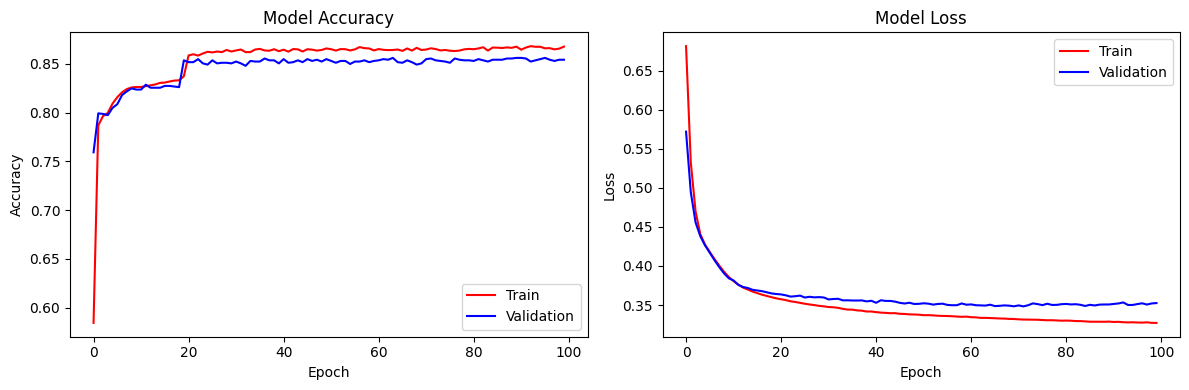

In [75]:
g, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot Accuracy
axes[0].plot(history.history['accuracy'], color='red', label='Train')
axes[0].plot(history.history['val_accuracy'], color='blue', label='Validation')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot Loss
axes[1].plot(history.history['loss'], color='red', label='Train')
axes[1].plot(history.history['val_loss'], color='blue', label='Validation')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

In [69]:
model.layers[1].get_weights()

[array([[ 4.1475108e-01,  8.7790072e-02, -3.9600059e-01],
        [-1.0953802e-01, -4.1164562e-01, -8.5544604e-01],
        [-3.4368038e-03, -1.1960732e+00,  3.4982011e-01],
        [ 1.0820280e+00,  8.6270599e-04,  4.6719715e-01],
        [ 3.3047065e-01, -6.6660351e-01,  4.5644137e-01],
        [ 3.3661529e-01, -2.2353332e-01,  1.1567738e+00],
        [ 5.2973384e-01, -2.2962224e-02,  3.3638152e-01],
        [-3.4433167e-02,  6.2729436e-01,  7.3042536e-01],
        [-1.9413650e+00, -1.2119403e+00, -2.4070339e-01],
        [ 2.8995335e-01,  5.7381427e-01,  5.1337504e-01],
        [ 6.3158959e-01,  1.6026935e-01, -3.3899280e-01]], dtype=float32),
 array([ 0.07451659, -0.10284427,  0.8239124 ], dtype=float32)]

In [70]:
y_log = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [71]:
y_pred = np.where(y_log>0.5, 1, 0)

In [73]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8595

**Accoracy History :**

Test 1:
- epochs = 10,
- layers = Dense(3, activation='sigmoid', input_dim=11)
- Accuracy = 79%

Test 2:
- epochs = 10,
- layers = Dense(3, activation='relu', input_dim=11)
- Accuracy = 80%


Test 3:
- epochs = 10,
- layers = Dense(11, activation='relu', input_dim=11),
           Dense(3, activation='relu')
- Accuracy = 85%